**Importing the Necessary Libraries**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

**Loading the Dataset**

In [ ]:
file_path = "/content/household_power_consumption.txt"
data = pd.read_csv(file_path, sep=';', low_memory=False)

In [ ]:
print(data.head())
print(data.info())
print(data.describe())

         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column      

**Dropping rows with Missing Values**

In [ ]:
data.replace("Nan", np.nan, inplace=True)
data.dropna(inplace=True)

for col in data.columns[2:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [ ]:
downsampled_data = data.sample(frac=0.1, random_state=42)
downsampled_data['DateTime'] = pd.to_datetime(downsampled_data['Date'] + ' ' + downsampled_data['Time'],
                                              format='%d/%m/%Y %H:%M:%S')
downsampled_data.drop(['Date', 'Time'], axis=1, inplace=True)

**Splitting data into Features and Target**

In [ ]:
X = downsampled_data.drop('Global_active_power', axis=1)  # Assuming target is 'Global_active_power'
y = downsampled_data['Global_active_power']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training a Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Convert the datetime column BEFORE splitting the data:
downsampled_data['DateTime'] = downsampled_data['DateTime'].astype('int64') // 10**9

# 2. Now perform the train-test split:
X = downsampled_data.drop('Global_active_power', axis=1)
y = downsampled_data['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Fit the model:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Neural Network': MLPRegressor(random_state=42, max_iter=500)
}

**Training and Evaluate Each Model**

In [ ]:
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'MAE': mae, 'R^2': r2}

Training Linear Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training Support Vector Regressor...
Training Neural Network...


**Displaying Results**

In [ ]:
results_df = pd.DataFrame(results).T
print("\nModel Evaluation Results:")
print(results_df)


Model Evaluation Results:
                                MSE       MAE        R^2
Linear Regression          0.001686  0.025882   0.998516
Decision Tree              0.001865  0.020679   0.998358
Random Forest              0.001056  0.016174   0.999071
Gradient Boosting          0.001212  0.021398   0.998933
Support Vector Regressor   1.366706  0.779432  -0.202867
Neural Network            68.986765  8.217233 -59.716696


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.0016855943426538735
R^2 Score: 0.9985164731322842


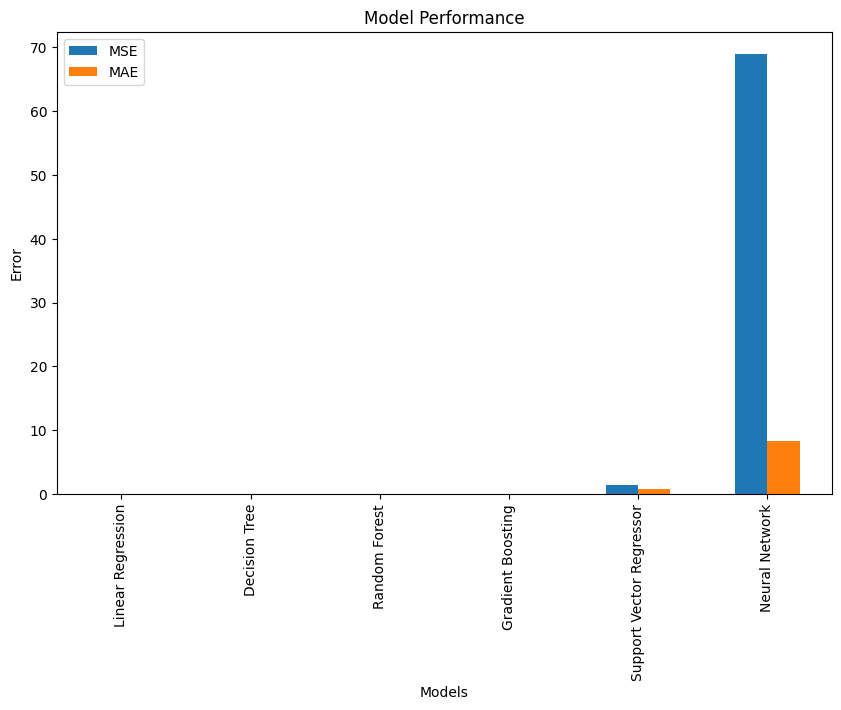

In [ ]:
import matplotlib.pyplot as plt

results_df[['MSE', 'MAE']].plot(kind='bar', figsize=(10, 6), title="Model Performance")
plt.xlabel("Models")
plt.ylabel("Error")
plt.show()